# Assignment
---
Read about (Susanna Epp pp. 704):
1. Kruskal's Algorithm
2. Prim's Algorithm
3. Djitraka's Shortest Path Algorithm

Given the following graph, implement the algorithm in Python.

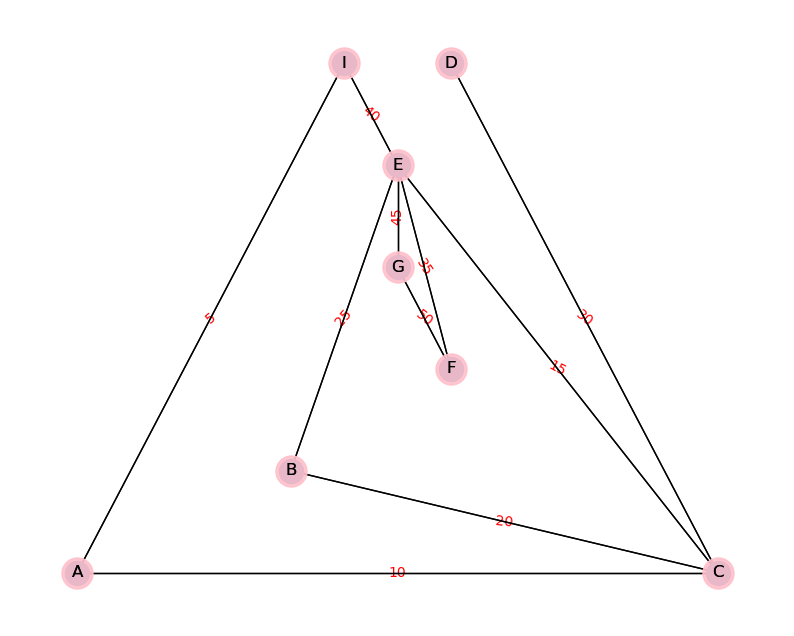

In [7]:
import matplotlib.pyplot as plt
import networkx as nx
seed = 55
# Use seed for reproducibility
G = nx.Graph()
plt.figure(figsize=(10, 8))
# Add nodes
G.add_nodes_from(["A","B","C","D","E","F","G"])
# Add self-loops to the remaining nodes
edgelist = [("A","C"),("A","I"),("C","B"),("C","E"),("C","D"),("B","E"),("I","E"),("E","F"),("F","G"),("G","E")]
G.add_edges_from(edgelist)
pos = nx.planar_layout(G)  # Seed for reproducible layout
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A","C"):10,("A","I"):5,("C","B"):20,("C","E"):15,("C","D"):30,("B","E"):25,("I","E"):40,("E","F"):35,("F","G"):50,("G","E"):45},
    font_color='red'
)
nx.draw(G, pos=pos,with_labels=True)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True)

plt.show()

$\textbf{1. Kruskal's Algorithm}$

To implement Kruskal's Algorithm for the given graph, we need to follow these steps:

1. Sort all the edges of the graph in non-decreasing order of their weights.
2. Initialize an empty set to store the minimum spanning tree (MST) edges.
3. Iterate through the sorted edges. For each edge:
    - If adding the edge to the MST does not form a cycle, add it to the MST.
    - Use a disjoint-set data structure (Union-Find) to check for cycles.
4. Return the set of MST edges.

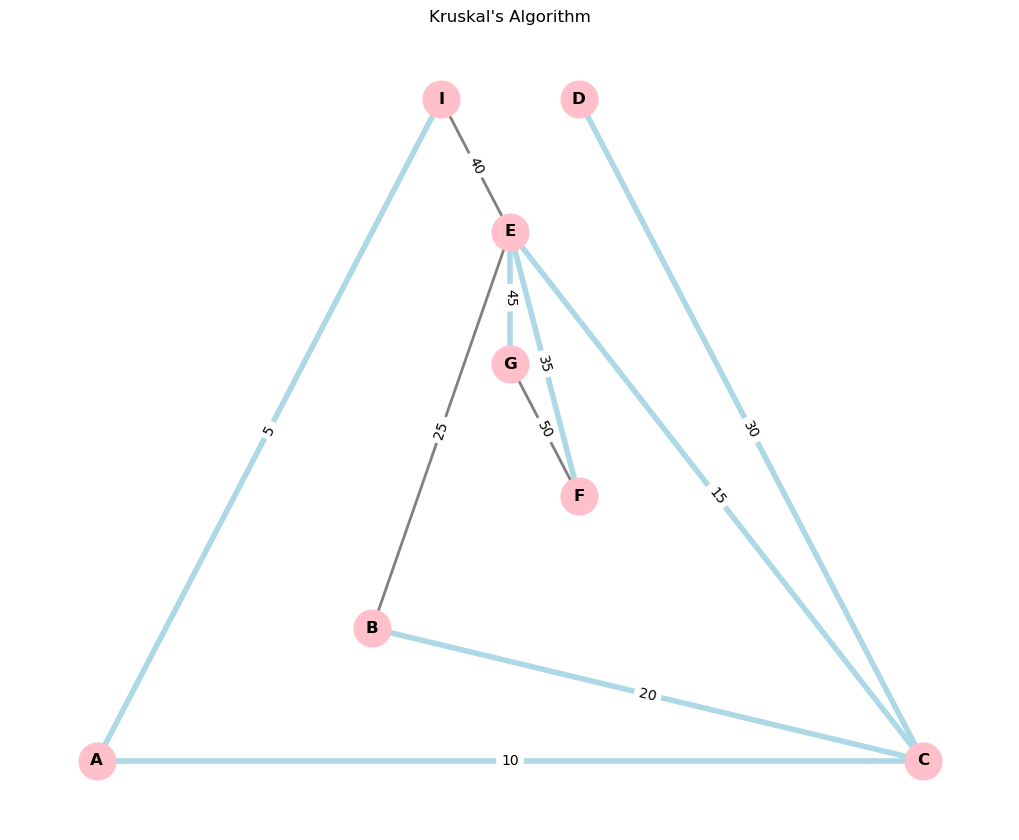

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

def kruskal_algorithm(G):
    # Initialize the minimum spanning tree
    MST = nx.Graph()
    
    # Sort edges by weight
    sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'])
    
    # Create a disjoint set data structure
    disjoint_set = {node: {node} for node in G.nodes()}
    
    # Iterate through the sorted edges
    for u, v, data in sorted_edges:
        if find(disjoint_set, u) != find(disjoint_set, v):
            # Add the edge to the minimum spanning tree
            MST.add_edge(u, v, **data)
            
            # Merge the sets containing u and v
            union(disjoint_set, u, v)
            
    return MST

def find(disjoint_set, node):
    return next(iter([k for k, v in disjoint_set.items() if node in v]))

def union(disjoint_set, u, v):
    root_u = find(disjoint_set, u)
    root_v = find(disjoint_set, v)
    if root_u != root_v:
        disjoint_set[root_u].update(disjoint_set[root_v])
        del disjoint_set[root_v]

# Define the graph
G = nx.Graph()
plt.figure(figsize=(10, 8))
G.add_nodes_from(["A","B","C","D","E","F","G","I"])
edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15), ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35), ("F", "G", 50), ("G", "E", 45)]
G.add_weighted_edges_from(edgelist)

# Run Kruskal's algorithm
MST = kruskal_algorithm(G)

# Draw the original graph
pos = nx.planar_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='pink', font_size=12, font_weight='bold', edge_color='gray', width=2)

# Draw the minimum spanning tree
nx.draw_networkx_edges(MST, pos=pos, edge_color='lightblue', width=4)

# Display edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_color='black')

# Set the title of the graph
plt.title("Kruskal's Algorithm")

plt.show()

$\textbf{2. Prim's Algorithm}$

To implement Prim's Algorithm for the given graph, we need to follow these steps:

1. Choose an arbitrary vertex as the starting vertex.
2. Initialize an empty set to store the vertices of the minimum spanning tree (MST).
3. Initialize a priority queue to store the edges and their weights.
4. Add all the edges incident to the starting vertex to the priority queue.
5. While the priority queue is not empty and the MST does not include all vertices:
    - Remove the edge with the minimum weight from the priority queue.
    - If adding this edge to the MST does not form a cycle, add it to the MST and update the priority queue with new edges.
6. Return the set of MST edges.

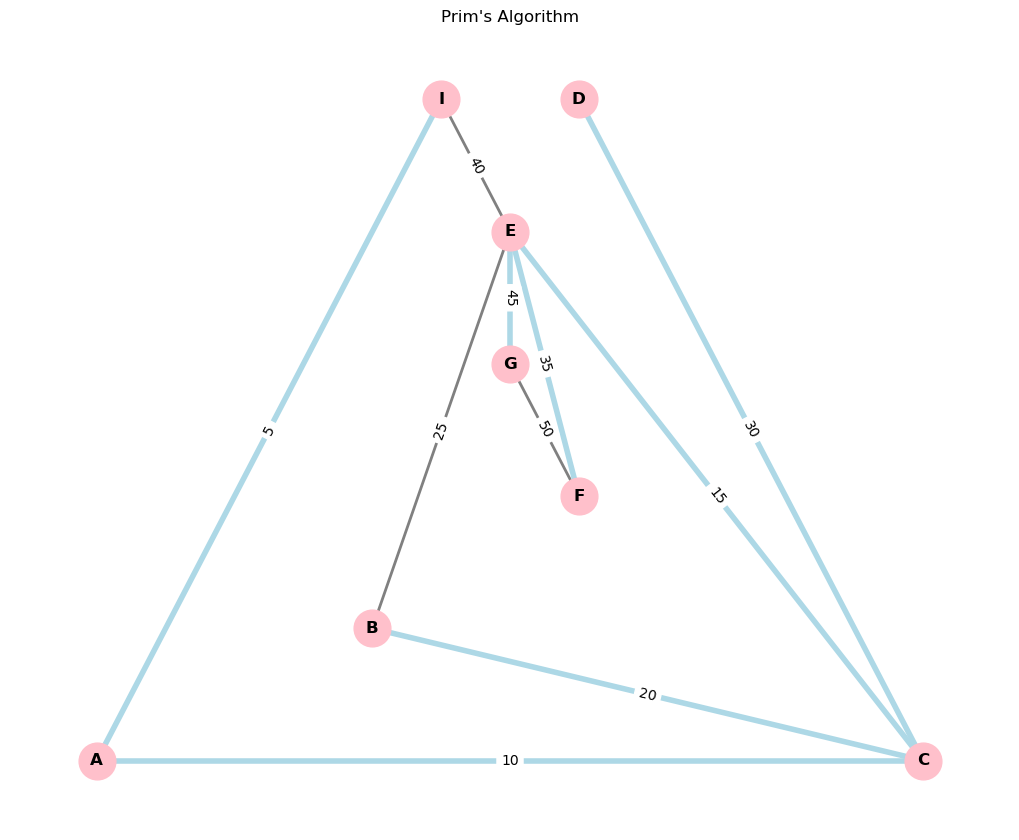

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

def prim(graph):
    # Create a copy of the graph to work with
    mst = nx.Graph(graph)
    
    # Initialize the minimum spanning tree
    MST = nx.Graph()
    
    # Select an arbitrary starting node
    start_node = 'I'
    
    # Initialize set of visited nodes
    visited = {start_node}
    
    # Initialize set to store MST edges
    MST_edges = set()
    
    # Iterate until all nodes are visited
    while len(visited) < len(mst.nodes()):
        # Find the minimum weight edge connecting a visited node to an unvisited node
        min_edge = None
        min_weight = float('inf')
        for u in visited:
            for v in mst.neighbors(u):
                if v not in visited and mst[u][v]['weight'] < min_weight:
                    min_edge = (u, v)
                    min_weight = mst[u][v]['weight']
        
        # Add the selected edge to the minimum spanning tree
        u, v = min_edge
        MST.add_edge(u, v, weight=min_weight)
        
        # Add the edge to the set of MST edges
        MST_edges.add((u, v))
        
        # Mark the newly visited node
        visited.add(v)
    
    # Draw the original graph
    plt.figure(figsize=(10, 8))
    pos = nx.planar_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_size=700, node_color='pink', font_size=12, font_weight='bold', edge_color='gray', width=2)

    # Draw the minimum spanning tree edges
    nx.draw_networkx_edges(graph, pos=pos, edgelist=list(MST_edges), edge_color='lightblue', width=4)

    # Display edge labels
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels=edge_labels, font_color='black')
    
    # Set the title of the graph
    plt.title("Prim's Algorithm")

    plt.show()

# Define the graph
G = nx.Graph()
G.add_nodes_from(["A","B","C","D","E","F","G","I"])
edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15), ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35), ("F", "G", 50), ("G", "E", 45)]
G.add_weighted_edges_from(edgelist)

# Run Prim's algorithm
prim(G)


$\textbf{3. Djitraka's Shortest Path Algorithm}$

To implement Dijkstra's Shortest Path Algorithm for the given graph, we need to follow these steps:

1. Initialize a dictionary to store the distances from the source vertex to all other vertices. Initially, set the distance of the source vertex to 0 and the distance of all other vertices to infinity.
2. Initialize a priority queue to store vertices and their corresponding distances from the source vertex.
3. While the priority queue is not empty:
    - Remove the vertex with the smallest distance from the priority queue.
    - For each neighbor of this vertex:
        - Calculate the distance to the neighbor through the current vertex.
        - If this distance is smaller than the previously recorded distance, update the distance and enqueue the neighbor.
4. Return the dictionary of distances.

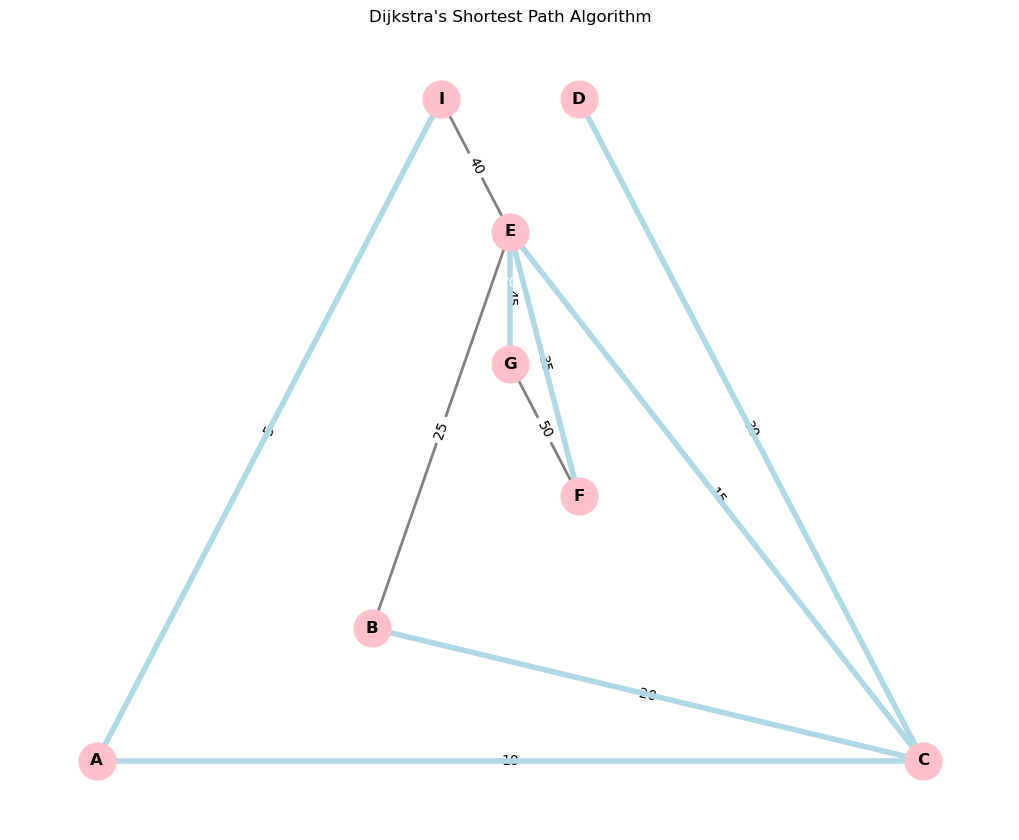

In [33]:
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra(graph, start):
    distance = {node: float('inf') for node in graph.nodes()}
    distance[start] = 0
    visited = set()
    
    while len(visited) < len(graph.nodes()):
        current_node = min((node for node in graph.nodes() if node not in visited), key=lambda x: distance[x])
        visited.add(current_node)
        
        for neighbor in graph.neighbors(current_node):
            if neighbor not in visited:
                new_distance = distance[current_node] + graph[current_node][neighbor].get('weight', 1)
                if new_distance < distance[neighbor]:
                    distance[neighbor] = new_distance
    
    # Plot the graph
    plt.figure(figsize=(10, 8))
    G = nx.Graph()
    G.add_nodes_from(["A","B","C","D","E","F","G","I"])
    edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15), ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35), ("F", "G", 50), ("G", "E", 45)]
    G.add_weighted_edges_from(edgelist)

    # Plot the graph
    pos = nx.planar_layout(G)
    nx.draw(G, pos=pos, with_labels=True, node_size=700, node_color='pink', font_size=12, font_weight='bold', edge_color='gray', width=2)

    # Display edge labels
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_color='black')

    # Annotate nodes with their distances from the start node
    for node, dist in distance.items():
        plt.text(pos[node][0], pos[node][1] + 0.1, f'{dist}', ha='center', va='center', fontsize=10, color='white')

    # Draw the minimum spanning tree edges in light blue
    MST_edges = nx.minimum_spanning_edges(G)
    for u, v, data in MST_edges:
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=4, edge_color='lightblue')
    
    # Set the title
    plt.title("Dijkstra's Shortest Path Algorithm")
    
    plt.show()

# Create a graph
G = nx.Graph()
G.add_nodes_from(["A","B","C","D","E","F","G","I"])
edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15), ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35), ("F", "G", 50), ("G", "E", 45)]
G.add_weighted_edges_from(edgelist)

# Run Dijkstra's algorithm
dijkstra(G, 'A')